In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
metadata_dict = {}
metadata = pd.read_csv('/home/mar/Documents/TFM/GitHub/HB_PublicData/1-Obtaining-DEGs-for-HB/Metadata_HB/HB_joint_METADATA.tsv',sep='\t')
lst = []
for i in metadata['type']:
    if str(i).startswith('Hepatoblastoma'):
        lst.append('case')
    elif str(i).startswith('Normal'):
        lst.append('control')
    else:
        lst.append('other')
metadata['class'] = lst
metadata_dict = pd.Series(metadata['class'].values,index=metadata['sample']).to_dict()

In [60]:
data = pd.read_csv('/home/mar/Documents/TFM/GitHub/HB_PublicData/1-Obtaining-DEGs-for-HB/Matrices_HB/Joint_matrix.txt', sep=';', index_col=0, header=0)
data.columns = data.columns.map(metadata_dict)

In [67]:
data_T = data.transpose()
data_T.head()

gene,5S_rRNA,A1BG,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
control,0.0,12.945060,11.364671,16.843844,3.889575,1.723998,2.274762,0.000000,6.083249,0.000000,...,6.267081,4.587069,6.952493,8.295892,8.354603,5.891310,11.719631,8.939224,9.843236,9.478874
control,0.0,12.834613,11.415502,16.728888,6.061951,0.987110,2.563415,0.000000,6.040583,0.000000,...,5.559611,1.980622,7.231663,9.176273,8.653648,5.905270,9.996497,8.813365,10.273333,10.076104
control,0.0,13.572898,11.908550,17.173702,6.393288,1.902316,4.333917,1.498465,5.914711,0.000000,...,5.678044,4.333917,7.049088,9.241301,8.931880,5.297697,11.063043,8.537451,9.907278,9.970329
case,0.0,4.314547,3.252039,13.094049,5.850344,1.252643,3.416763,1.252643,8.009746,1.620194,...,6.513196,5.462592,5.850344,6.919710,8.128560,1.252643,9.406822,9.903702,9.119419,8.773126
case,0.0,11.379509,10.259515,15.938659,3.929974,0.000000,0.000000,0.000000,5.450413,0.000000,...,6.174120,7.646645,6.433821,7.838390,9.260692,0.000000,8.835235,7.646645,10.387739,10.118773


### AXIN2

In [72]:
AXIN2 = data_T['AXIN2']
AXIN2 = pd.DataFrame(AXIN2)
AXIN2.columns = ['value']
AXIN2= AXIN2.rename_axis('type')
AXIN2

,value
type,
control,5.055243
control,4.782392
control,4.045798
case,10.877195
case,8.789533
...,...
case,2682.000000
case,3216.000000
case,2580.000000


In [77]:
# Set figure size for the notebook
plt.rcParams["figure.figsize"]=12,8

# set seaborn whitegrid theme
sns.set(style="whitegrid")

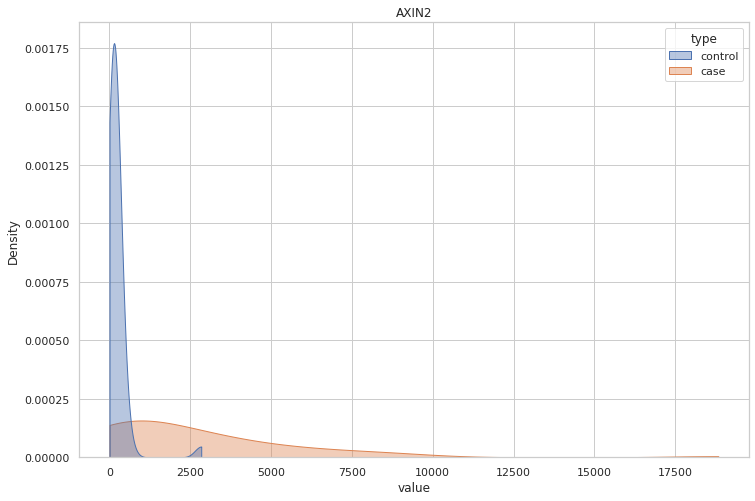

In [86]:
sns.kdeplot(data=AXIN2, x="value", hue="type", cut=0, fill=True, common_norm=False, alpha=0.4).set_title('AXIN2')
plt.show()


In [38]:
axin2 = data.iloc["AXIN2"]

In [39]:
axin2

control       5.055243
control       4.782392
control       4.045798
case         10.877195
case          8.789533
              ...     
case       2682.000000
case       3216.000000
case       2580.000000
case        916.000000
case       3409.000000
Name: AXIN2, Length: 97, dtype: float64